In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv('loan_data.csv')

In [13]:
#Check info(), head(), and describe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,0,debt_consolidation,0.1836,630.39,11.877569,29.96,667,13979.041670,212629,87.4,3,0,0,1
1,0,credit_card,0.1576,192.72,10.691945,29.95,692,2790.000000,26313,58.5,9,0,2,0
2,0,all_other,0.1791,144.43,10.868568,29.90,662,3119.958333,15473,65.3,0,1,0,0
3,0,educational,0.1759,107.85,10.759072,29.74,662,4500.000000,2663,20.3,0,1,0,0
4,0,debt_consolidation,0.1797,361.38,11.289782,29.72,672,8489.958333,25879,77.2,2,3,0,0


In [15]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


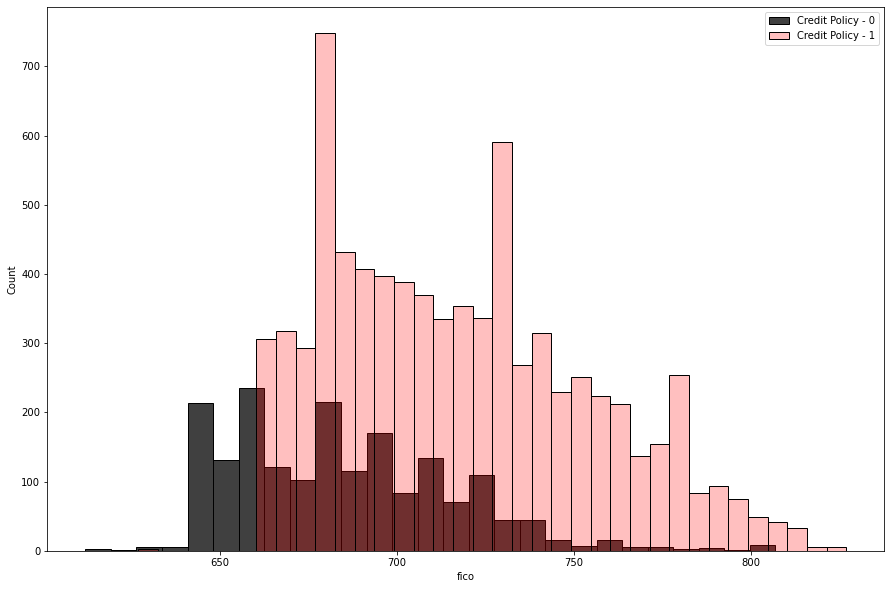

In [59]:
#Create a plot for each credit.policy (both plots in the same figure)
fig, sub = plt.subplots(figsize = (15,10))
sns.histplot(df[df['credit.policy'] == 0]['fico'], color = 'black', ax=sub, label = 'Credit Policy - 0')
sns.histplot(df[df['credit.policy']==1]['fico'], color = 'red', ax=sub, alpha = .25, label = 'Credit Policy - 1')
plt.legend(loc = 1)

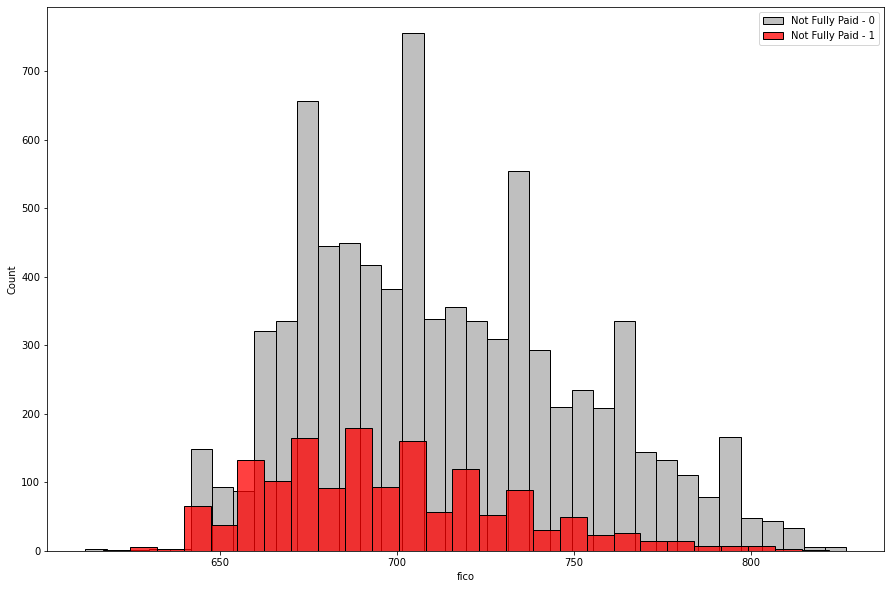

In [65]:
#Create a plot for each credit.policy, but select by the not.fully.paid column
fig, ax = plt.subplots(figsize = (15,10))
sns.histplot(df[df['not.fully.paid'] == 0]['fico'], color = 'black', alpha = .25, ax=ax, label = 'Not Fully Paid - 0')
sns.histplot(df[df['not.fully.paid']==1]['fico'], color = 'red', ax=ax, label = 'Not Fully Paid - 1')
plt.legend(loc = 1)

<AxesSubplot:xlabel='purpose', ylabel='count'>

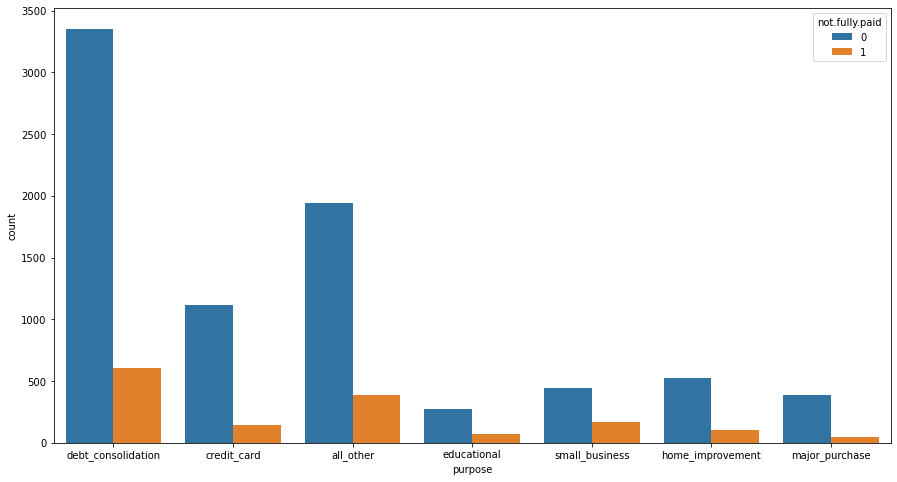

In [77]:
#Create a countplot for the counts of loan purpose, pick a hue defined by not.fully.paid
plt.figure(figsize=(15, 8))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data=df)

<Figure size 1152x432 with 0 Axes>

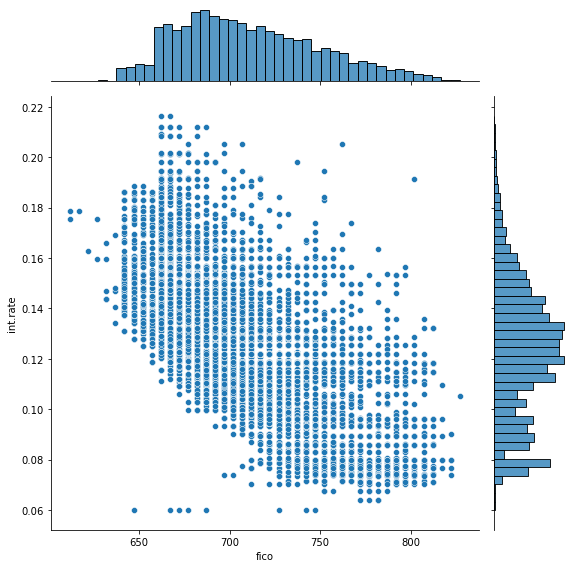

In [75]:
#Create a joint plot between FICO score and interest rate
sns.jointplot(x = 'fico', y = 'int.rate', data=df,height = 8)

In [78]:
#We are trying to predict if the customer will pay lending club back if they are given a loan based on all
#the data columns in loan_data